In [1]:
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## DATASET Aquisition

**Ensure the dataset is downloaded from**:
https://storage.pawsey.org.au/public/m/FDFML/frames
https://storage.pawsey.org.au/public/m/FDFML/metadata

In [3]:
# Update these paths according to your dataset location
image_folder = '/content/drive/MyDrive/oz_frames'
annotation_file = '/content/drive/MyDrive/oz_metadata/frame_metadata.csv'


In [4]:
# Load annotations
annotations = pd.read_csv(annotation_file)

# Preview annotations structure
print(annotations.head())

   uid               file_name    x0   y0    x1   y1        family  \
0    1  A000001_L.avi.5107.png   806  371   922  448      Scaridae   
1    2  A000001_R.avi.4902.png  1388  355  1508  435      Scaridae   
2    3  A000001_L.avi.5174.png   912  280   994  335      Scaridae   
3    4  A000001_R.avi.4969.png  1600  255  1682  310      Scaridae   
4    5  A000001_L.avi.5194.png   811  472   979  584  Acanthuridae   

        genus         species  
0   Chlorurus  capistratoides  
1   Chlorurus  capistratoides  
2   Chlorurus  capistratoides  
3   Chlorurus  capistratoides  
4  Acanthurus    leucocheilus  


In [10]:
# Check available images in the local folder
available_images = set(os.listdir(image_folder))

# Filter annotations to match available images
annotations = annotations[annotations['file_name'].isin(available_images)]

## DATASET VISUALISATION

In [17]:

# Visualization function with vertical flip correction and multiple annotations
def show_random_images_with_annotations(n_images=5):
    selected_files = random.sample(list(annotations['file_name'].unique()), n_images)

    for file_name in selected_files:
        image_path = os.path.join(image_folder, file_name)

        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Could not load image: {image_path}")
            continue

        # Check if image is flipped vertically; correct if necessary
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 0)  # Flip vertically

        # Get annotations for the current image
        image_annotations = annotations[annotations['file_name'] == file_name]

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.imshow(image)

        # Draw bounding boxes and annotations for all annotations in the image
        for _, row in image_annotations.iterrows():
            x0, y0, x1, y1 = row['x0'], row['y0'], row['x1'], row['y1']
            # Adjust bounding box coordinates for vertically flipped image
            corrected_y0 = image.shape[0] - y1
            corrected_y1 = image.shape[0] - y0
            width, height = x1 - x0, corrected_y1 - corrected_y0

            rect = patches.Rectangle((x0, corrected_y0), width, height, linewidth=2, edgecolor='cyan', facecolor='none')
            ax.add_patch(rect)

            # Annotation details
            species_info = f"{row['family']} - {row['genus']} {row['species']}"
            plt.text(x0, corrected_y0 - 10, species_info, color='cyan')  # Display annotation details

        plt.title(file_name)  # Display image file name as title
        plt.axis('off')
        plt.show()

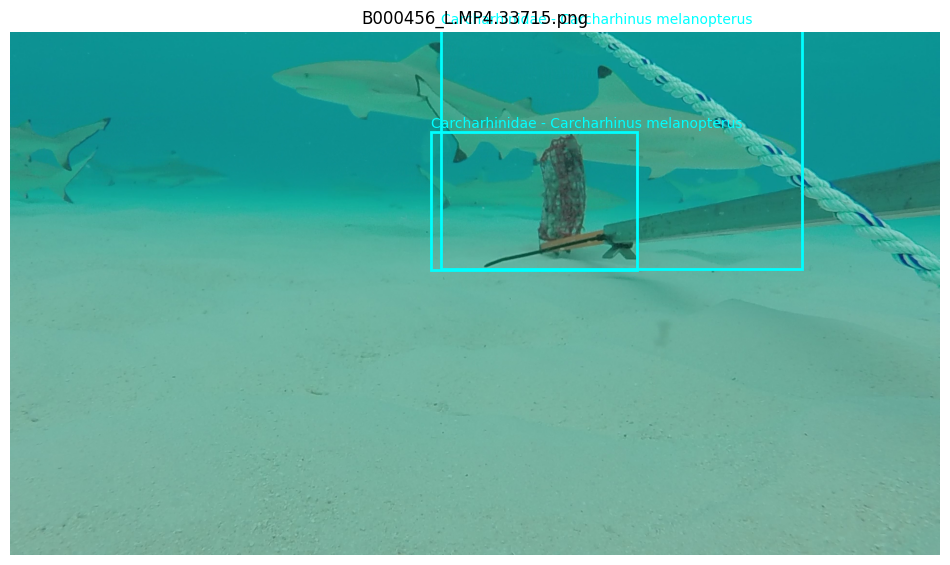

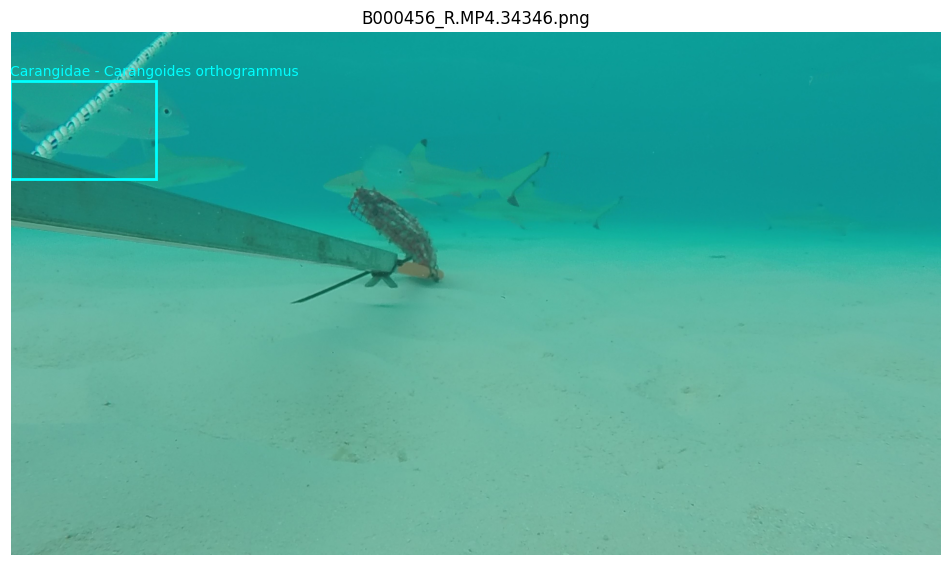

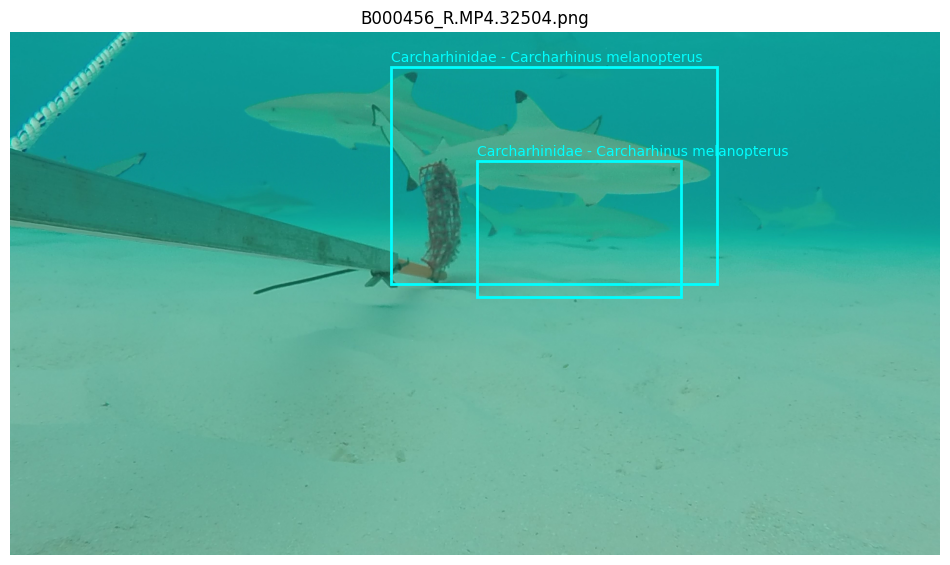

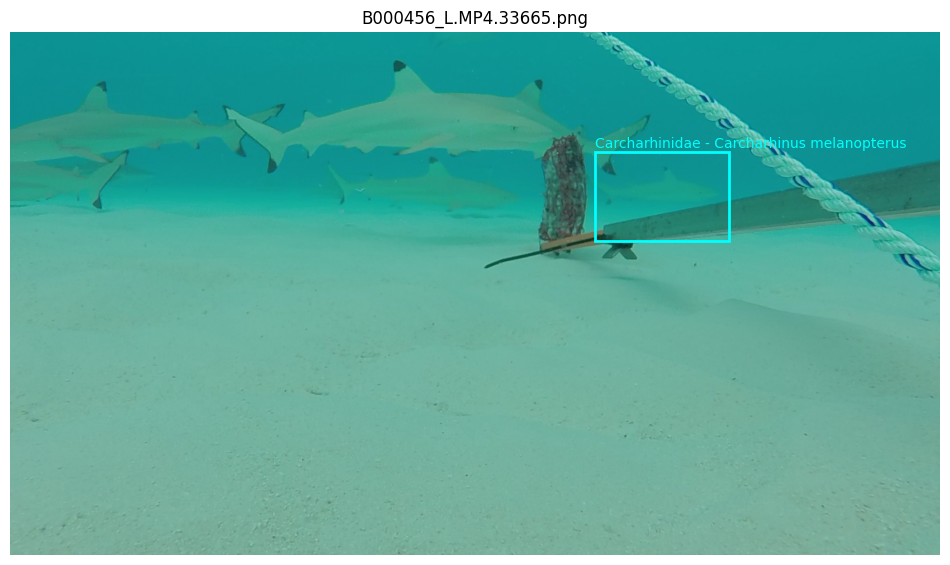

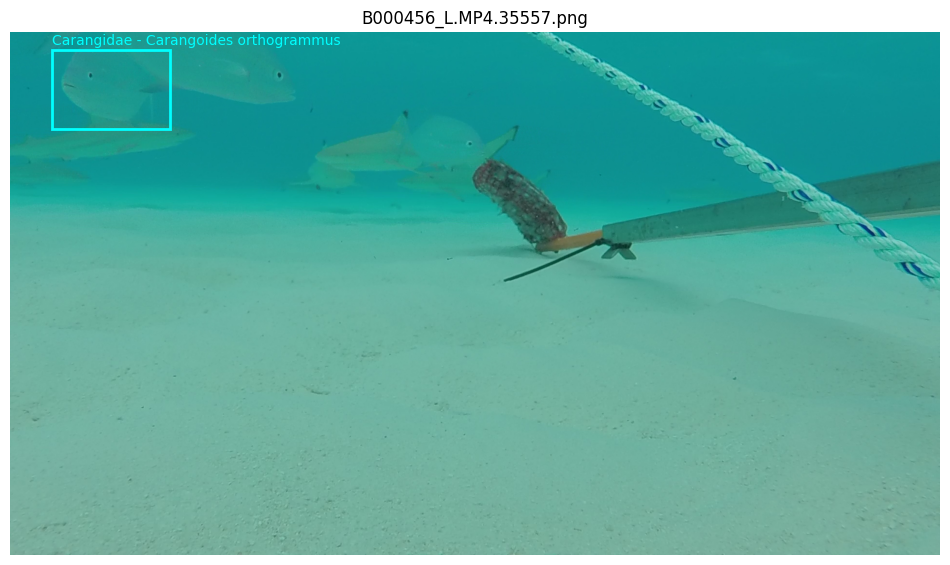

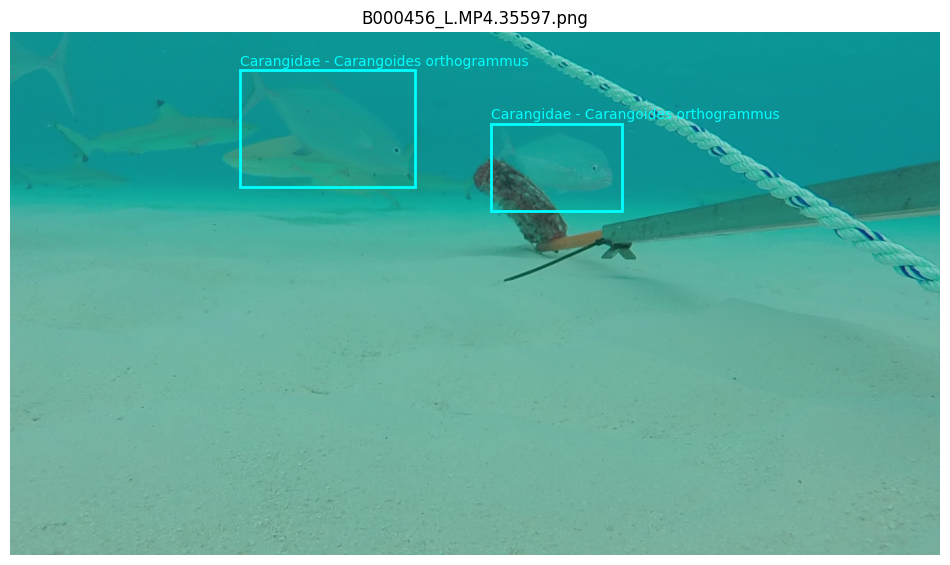

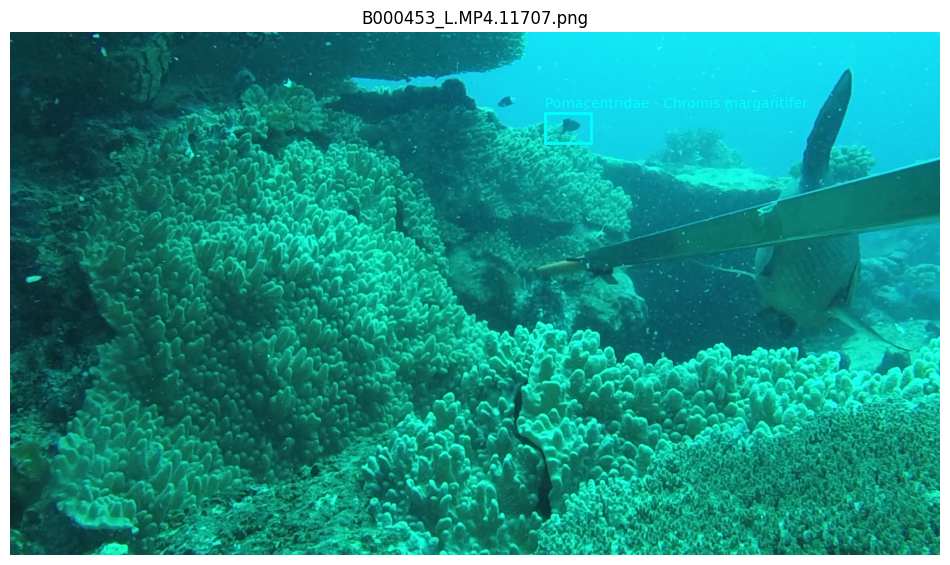

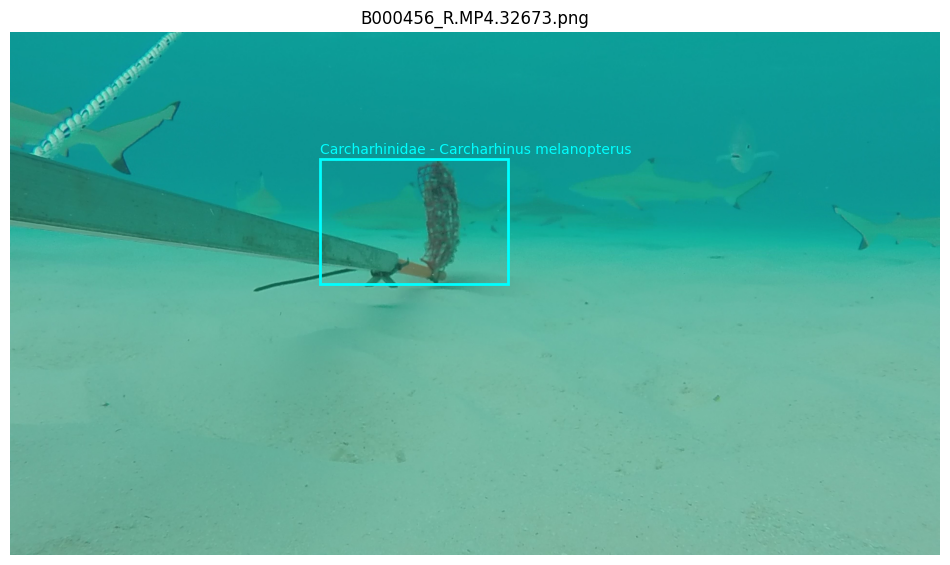

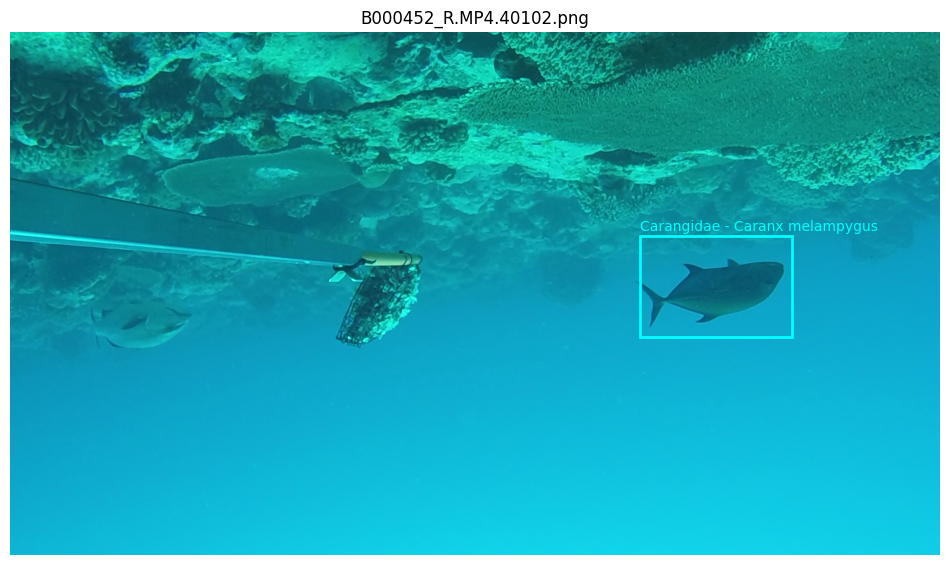

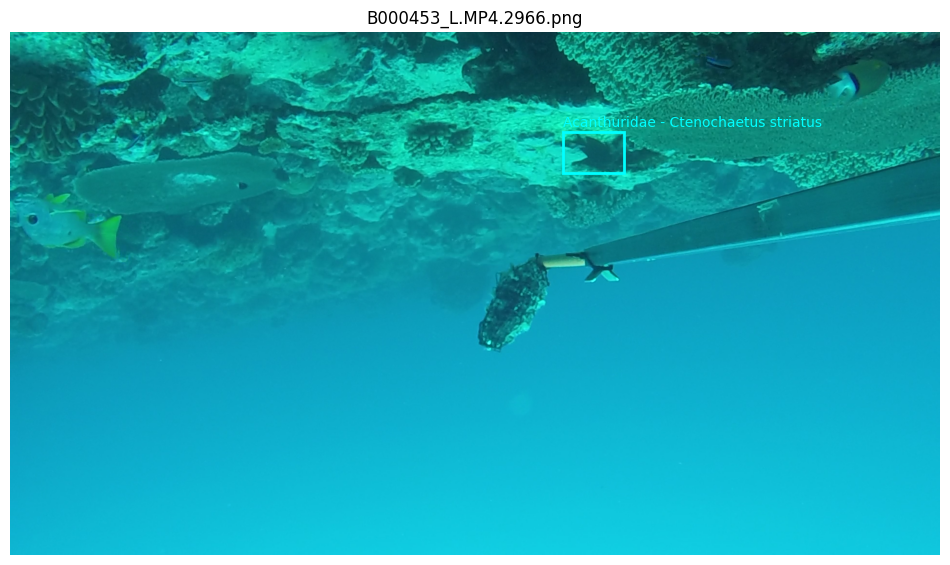

In [18]:
# Run the visualization
show_random_images_with_annotations(n_images=10)